<a href="https://colab.research.google.com/github/Nishanaziya/DSML/blob/master/knn_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("/content/IRIS.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df = df.drop(["Id"],axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
x = df.drop(["Species"],axis=1)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
y = df["Species"]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

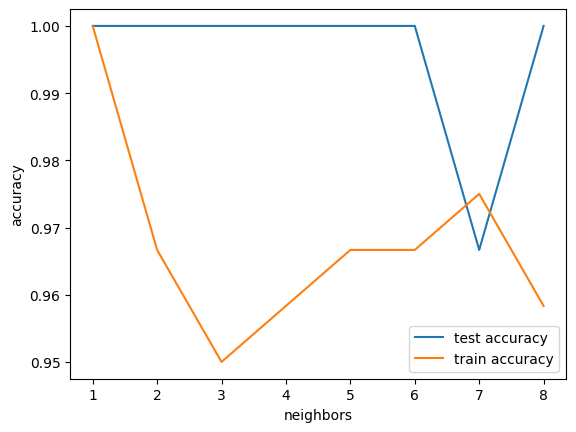

In [11]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors =k)
  knn.fit(x_train,y_train)

  test_accuracy[i] = knn.score(x_test,y_test)
  train_accuracy[i] = knn.score(x_train, y_train)

plt.plot(neighbors, test_accuracy, label ="test accuracy")
plt.plot(neighbors, train_accuracy, label = "train accuracy")
plt.legend()
plt.xlabel("neighbors")
plt.ylabel("accuracy")
plt.show()

In [12]:
knn =  KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

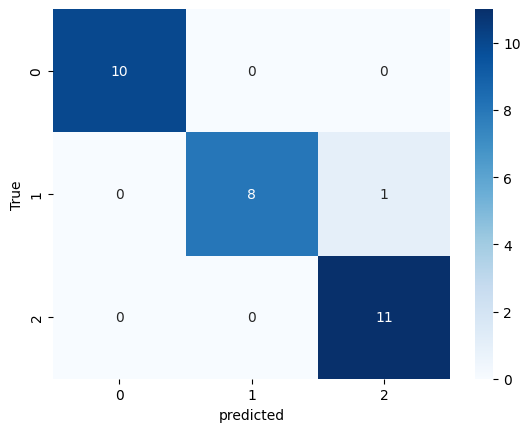

In [13]:
y_predict = knn.predict(x_test)

cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot =True, cmap="Blues", fmt="d")
plt.xlabel("predicted")
plt.ylabel("True")
plt.show()

In [14]:
print("Accuracy", knn.score(x_test,y_test))

Accuracy 0.9666666666666667


In [16]:
y_pred =[[3, 4,3,4]]
pred = knn.predict(y_pred)
print(pred)

['Iris-versicolor']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
